In [1]:
import numpy as np
from sklearn.manifold import TSNE

In [2]:

def get_filelist(path):
    with open(path, 'r') as fp:
        filelist = [line.rstrip() for line in fp]     
    return filelist


def load_2dfm(file_list, in_dir='youtube_2dfm_npy/', is_2d=False):
    inputs, labels = [], []
    for filename in file_list:
        set_id, version_id = filename.split('.')[0].split('_')
        set_id, version_id = int(set_id), int(version_id)
        in_path = in_dir + filename + '.npy'
        input = np.load(in_path) 
        if is_2d:
            input = np.reshape(input, (12, 75), 'F')
        inputs.append(input)
        labels.append(set_id)
    return np.array(inputs), np.array(labels)


In [22]:
filelist = get_filelist('filter_tsne')
two_dfm, y = load_2dfm(filelist)

In [23]:
X_embedded = TSNE(n_components=2).fit_transform(two_dfm)

In [24]:
X_embedded.shape

(1297, 2)

In [30]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [35]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(5,5))
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 7})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    with PdfPages('result2.pdf') as pdf:  
        pdf.savefig()
       


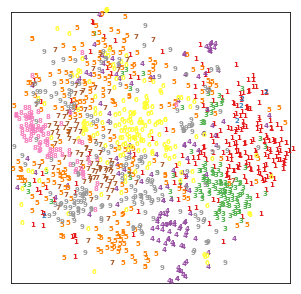

In [34]:
plot_embedding(X_embedded)

In [15]:
import torch
import torch.utils
import torchvision
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from utility import *
import logging, os
import numpy as np

/home/yzs/anaconda3/lib/python3.6/site-packages/torch/serialization.py:333: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


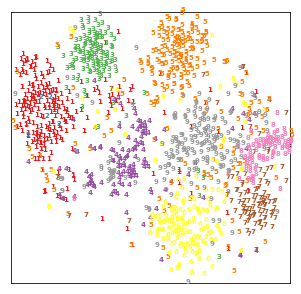

In [36]:
class Net(nn.Module):
    def __init__(self, num_classes,weight):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(900, weight)
        self.fc2 = nn.Linear(weight, num_classes)

    def forward(self, x):
        x = self.fc1(x.view(x.size(0), -1))
        #x = self.norm(x)
        output = self.fc2(x)
        return output, x
model_path = 'vvvoodoo_cen_linear_classify_500_BEST/3/100'
net = torch.load(model_path)
dataset = torch.utils.data.TensorDataset(torch.from_numpy(two_dfm), torch.from_numpy(y))
testloader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=False)
new_two_dfm = None
for data, target in testloader:
    inputs, labels = data, target
    inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
    outputs, new_sub_two_dfm = net(inputs)
        
    new_sub_two_dfm = new_sub_two_dfm.data.cpu().numpy()
       
    if new_two_dfm is not None:
        new_two_dfm = np.concatenate((new_two_dfm, new_sub_two_dfm), axis=0)
    else:
        new_two_dfm = new_sub_two_dfm
    new_two_dfm = norm(new_two_dfm)
NX_embedding = TSNE(n_components=2).fit_transform(new_two_dfm)
plot_embedding(NX_embedding)

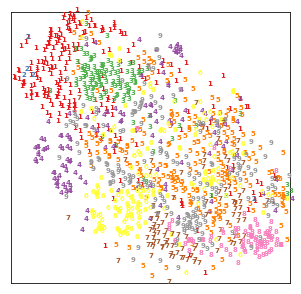

In [17]:
plot_embedding(X_embedded)